In [6]:
# MobileNet_testing

import numpy as np
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image 
# tf.keras.preprocessing.image.load_img(image_path)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
# tf.keras.applications.imagenet_utils.decode_predictions(preds, top=5)

from IPython.display import Image
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
# import glob
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

"""
(noticed: the following codes activate only when using GPU to run the model, 
 but I'm not using GPU support I think? )
"""
# # check to be sure that TensorFlow is able to identify the GPU

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))

# # set_memory_growth() allocate only as much GPU memory as needed at a given time, 
# # and continues to allocate more when needed

# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# (IndexError                                Traceback (most recent call last)
# <ipython-input-3-df3199446273> in <module>
#      37 # set_memory_growth() allocate only as much GPU memory as needed at a given time,
#      38 # and continues to allocate more when needed
# ---> 39 tf.config.experimental.set_memory_growth(physical_devices[0], True)

# IndexError: list index out of range)


"\n(noticed: the following codes activate only when using GPU to run the model, \n but I'm not using GPU support I think? )\n"

In [7]:
# downloading a copy of a single pretrained MobileNet, 
# with weights that were saved from being trained on ImageNet images
mobile = tf.keras.applications.mobilenet.MobileNet()

In [16]:
# prepare_image() takes an file name, and processes the image to get it in a format that MobileNet expects
def prepare_image(file):
    img_path = 'D:/Deep_Learning_Projects/MobileNet-test-samples/'  # defining the relative path to the images
    # load_img(img_path) takes the image file, and resizing it to be of size (224, 224), 
    # and returns an instance of a PIL image
    img = tf.keras.preprocessing.image.load_img(img_path + file, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)    # then converting the PIL image into an array
    # input_array = np.array([input_array])                    # converting single image to a batch

    # numpy.expand_dims(a, axis) insert a new dimension in "axis th" dimension, and 
    # all previous dimensions would be push to the right
    img_array_dims_expand = np.expand_dims(img_array, axis=0)
    # preprocess_inout() scale the pixel values in the image between -1 to 1, same format as the images that 
    # MobileNet was originally trained on, and return the preprocessed image data as a numpy array
    return tf.keras.applications.mobilenet.preprocess_input(img_array_dims_expand)


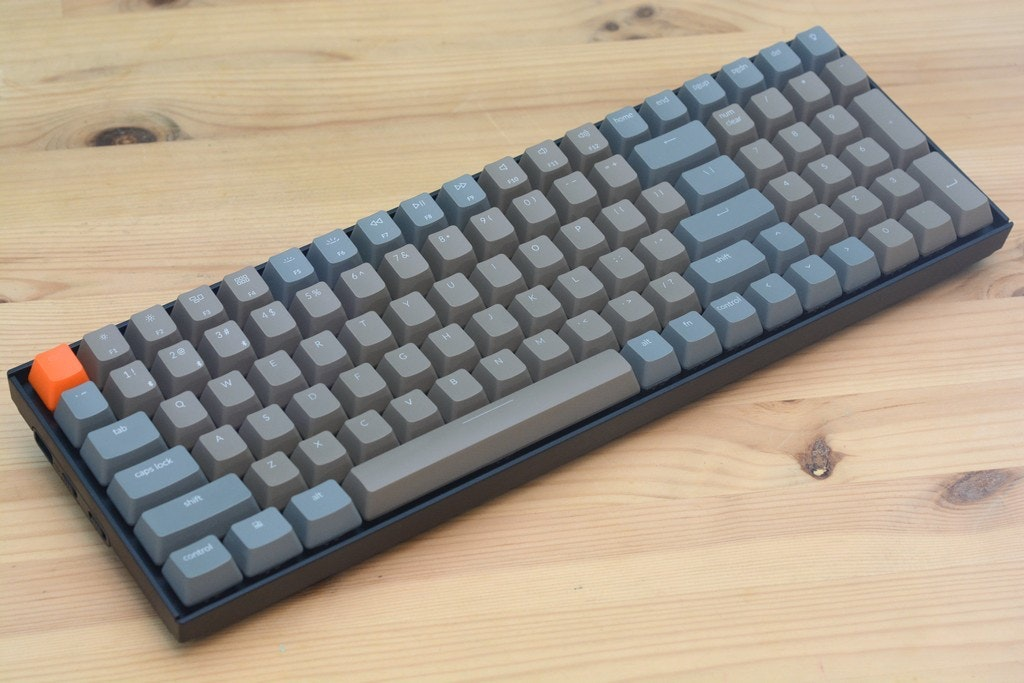

In [17]:
# just showing the test image on screen, test1 here is a wireless keyboard
# from IPython.display import Image
Image(filename='D:/Deep_Learning_Projects/MobileNet-test-samples/test1.jpg', width=300,height=200)

In [18]:
# geting some predictions from MobileNet and see how it works
preprocessed_image = prepare_image('test1.jpg') 
predictions = mobile.predict(preprocessed_image) # Model.predict() returns values of each class's probability
# decode_predictions() returns a list of lists of tuples [[(class_name, class_description, score), ...], ...]
# for top class prediction, in other words, it returns the top 5 ImageNet class predictions with the ImageNet 
# class ID, the class label, and the probability, respectively
results = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=5)
# print(results)
results

[[('n03085013', 'computer_keyboard', 0.82292867),
  ('n03793489', 'mouse', 0.07168145),
  ('n04118776', 'rule', 0.046576884),
  ('n04264628', 'space_bar', 0.030391978),
  ('n04505470', 'typewriter_keyboard', 0.021913288)]]

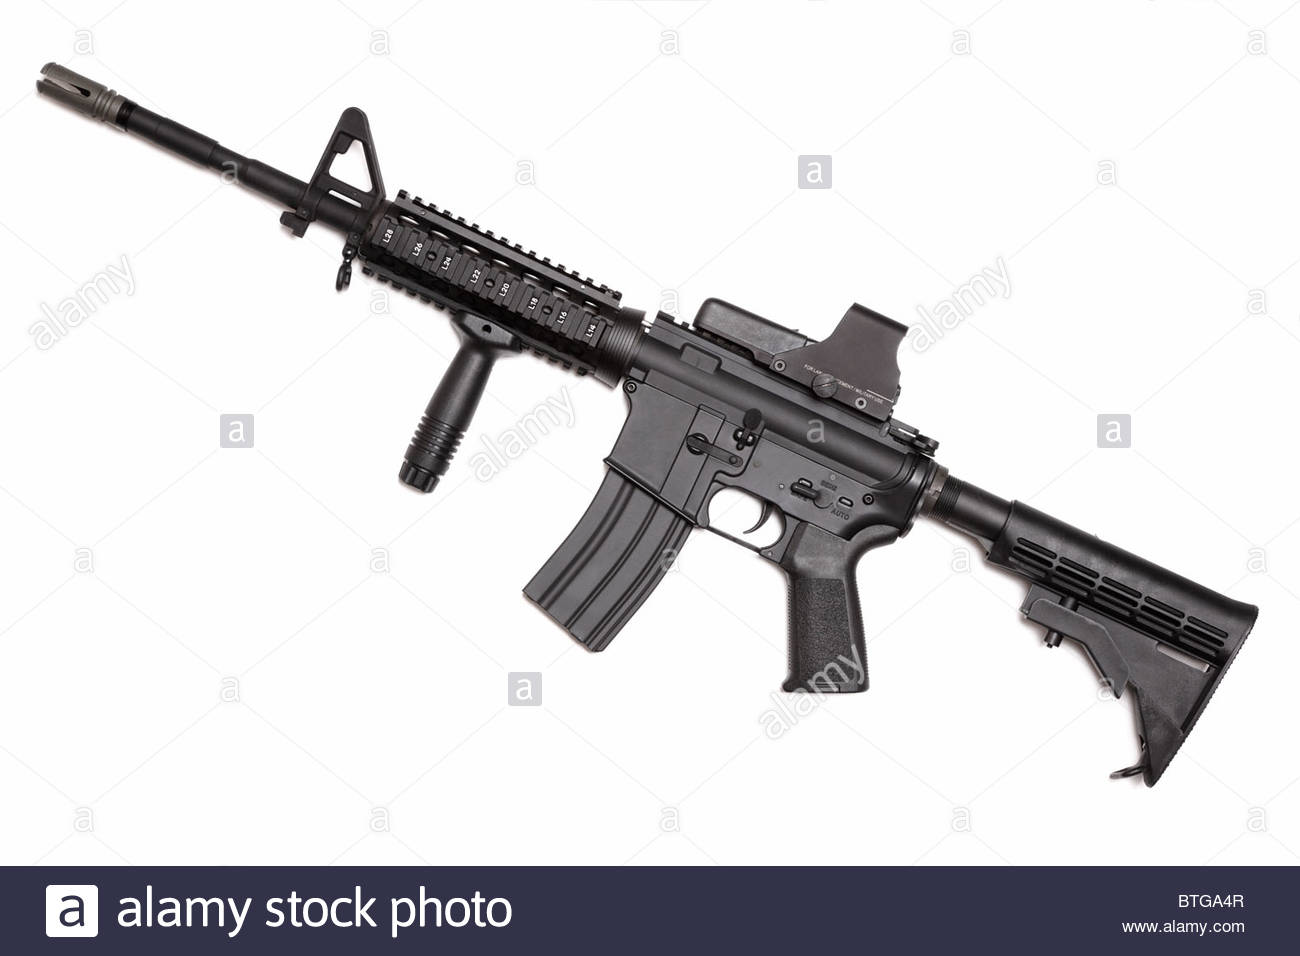

In [19]:
# showing the test image on screen, test2 here is a M4A1 assault rile
Image(filename='D:/Deep_Learning_Projects/MobileNet-test-samples/test2.jpg', width=300,height=200)

In [20]:
preprocessed_image = prepare_image('test2.jpg') 
predictions = mobile.predict(preprocessed_image)
results = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=5)
# print(results)
results

[[('n02749479', 'assault_rifle', 0.91681373),
  ('n04090263', 'rifle', 0.083157696),
  ('n04086273', 'revolver', 2.5340327e-05),
  ('n02879718', 'bow', 1.1898805e-06),
  ('n04552348', 'warplane', 6.2428364e-07)]]

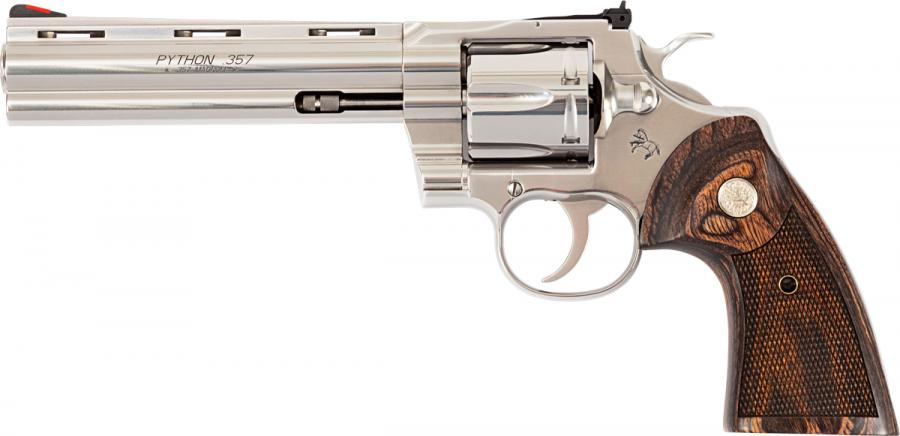

In [21]:
# showing the test image on screen, test2 here is a Colt Python revolver
Image(filename='D:/Deep_Learning_Projects/MobileNet-test-samples/test3.jpg', width=300,height=200)

In [23]:
preprocessed_image = prepare_image('test3.jpg') 
predictions = mobile.predict(preprocessed_image)
results = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=5)
# print(results)
results

[[('n04086273', 'revolver', 0.99991715),
  ('n04090263', 'rifle', 3.6049645e-05),
  ('n03527444', 'holster', 2.533774e-05),
  ('n02749479', 'assault_rifle', 5.050676e-06),
  ('n04141327', 'scabbard', 3.6702877e-06)]]